# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [117]:
#Importamos los CSV subidos en la plataforma de AWS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url_test = "https://datos-manuel-otero.s3.amazonaws.com/credit-test.csv"
url_train = "https://datos-manuel-otero.s3.amazonaws.com/credit-train.csv"
data_train = pd.read_csv(url_train)
data_test = pd.read_csv(url_test)

## 2.EDA y Visual EDA

In [118]:
#Primeros visualizaremos los datos en raw para analizar sus columnas.
data_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [119]:
#Ahora mostraremos tanto el numero de columnas como el tipo de datos de las columnas
print(data_train.shape)
print(data_train.info())

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   411

<AxesSubplot:>

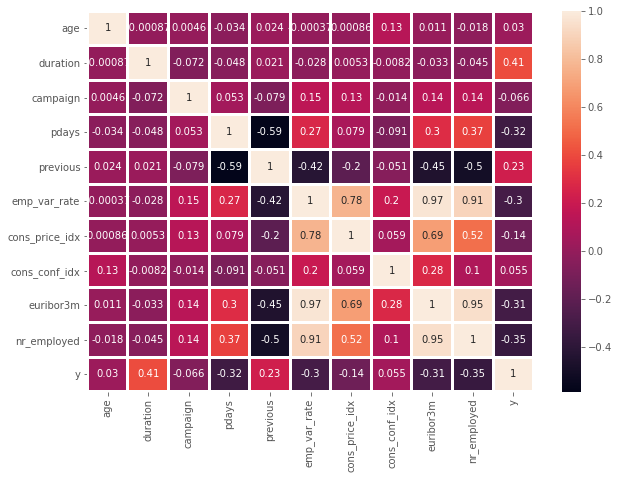

In [120]:
#Transformaremos los campos de job,marital,edu y housing a datos categoricos para conseguir un grafico de correlacion que se adapte mejor a los datos.
data_train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data_train.corr(),annot=True,linewidths=2)
#Como podemos observar, dentro de los parametros numericos tenemos, los más influyentes son: duration,nr_employed,euribor3m y previous

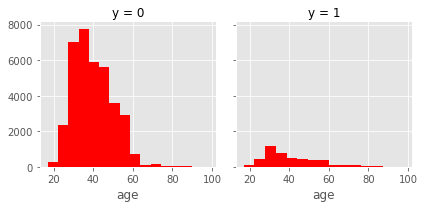

In [121]:
#Vamos a ver un histograma relacionando la Edad de los consumidores y si dijeron que si al credito
edad = sns.FacetGrid(data_train, col='y')
edad.map(plt.hist, 'age', bins=15,color='Red')

#Podemos observar que la mayoria de los que aceptaron el credito son en la franja de edad entre 25 y 40

In [122]:
#Lo que haremos aquí será que veamos la probabilidad de que digan que si al credito segun el tiempo en llamada
rangos = [-1,100,1000,2000,5000]
names = ['0-2 minutos','2-17 minutos','17-33 minutos','+33 minutos']
hola = data_train['minutos'] = pd.cut(data_train['duration'],rangos,labels=names)
data_train
data_train[['minutos', 'y']].groupby(['minutos'], as_index=False).mean().sort_values(by='minutos', ascending=False)

,minutos,y
3,+33 minutos,0.633333
2,17-33 minutos,0.589286
1,2-17 minutos,0.132197
0,0-2 minutos,0.008078


## 3. Preprocessing data


Transformacion de datos categoricos

In [123]:
#Podemos convertir las columna job de datos categoricos a datos numericos a traves de label enconder para ver si influye en la decision del credito
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enconded_position = le.fit_transform(data_train['job'])
data_train['trabajos_numericos'] = enconded_position
firrst_colum = data_train.pop('trabajos_numericos')
data_train.insert(0, 'trabajos_numericos' ,firrst_colum)
#Si mostrasemos la matriz de correlacion posterior veremos que no influye en nada. (Lo comento por si lo quisiseses visualizar)
#data_train.corr()
#plt.figure(figsize=(10,7))
#sns.heatmap(data_train.corr(),annot=True,linewidths=2)
data_train

,trabajos_numericos,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,minutos
0,1,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,2-17 minutos
1,9,53,technician,married,unknown,no,no,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,2-17 minutos
2,4,28,management,single,university.degree,no,yes,no,cellular,jun,...,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,2-17 minutos
3,7,39,services,married,high.school,no,no,no,cellular,apr,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,2-17 minutos
4,5,55,retired,married,basic.4y,no,yes,no,cellular,aug,...,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,2-17 minutos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,59,retired,married,high.school,unknown,no,yes,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0,2-17 minutos
41184,3,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,2-17 minutos
41185,0,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0-2 minutos
41186,9,48,technician,married,professional.course,no,no,yes,telephone,oct,...,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0,2-17 minutos


In [124]:
#Como podemos ver no tenemos ningun valor nulo en el dataset
data_train.isnull().sum()

trabajos_numericos    0
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
y                     0
minutos               0
dtype: int64

## Logistic-Regression
# --------------------------------------------------------------------------------

In [125]:
#Vamos a separar el dataset por aquellos que vimos que influyen más a la hora de la prediccion
dataframe_uso = data_train[['duration','nr_employed','euribor3m','previous','age','pdays','campaign','nr_employed','y']]

### 4. Creación del modelo y división del dataset

In [126]:
from sklearn.model_selection import train_test_split
X = dataframe_uso.drop('y',axis=1)
y = dataframe_uso['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


### 5. Entrenamiento

In [127]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',solver='newton-cg')
clf.fit(X_train,y_train)


C:\Users\Nolo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nolo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nolo\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(solver='newton-cg')

### 6. Análisis de resultados

In [128]:
clf.intercept_

array([59.21401611])

### 7. Realización de predicciones

In [129]:
clf.coef_

array([[ 0.00469716, -0.00588346, -0.14142593, -0.32210639,  0.00185118,
        -0.00209597, -0.05864016, -0.00588346]])

### 8. Visualización

In [130]:
clf.score(X_test,y_test)

0.9022416444120741

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10931
           1       0.62      0.38      0.48      1426

    accuracy                           0.90     12357
   macro avg       0.77      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357



# ------------------------------------------------------------------

## KNN-Classification
# --------------------------------------------------------------------------------

### 4. Creación del modelo y división del dataset

In [132]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


##### Miraremos cual es la mejor K

([<matplotlib.axis.XTick at 0x199c2571820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

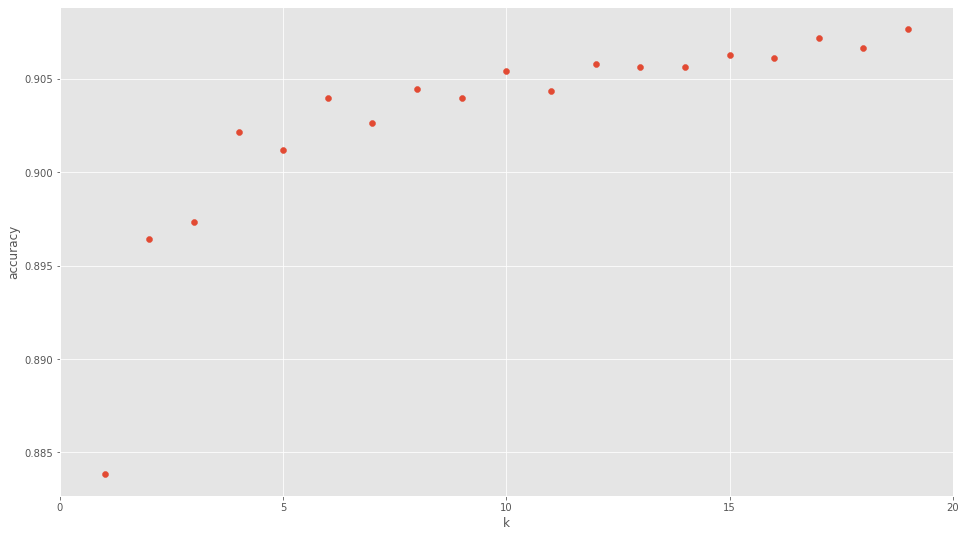

In [133]:
k_range = range(1, 20)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [134]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors)

### 5. Entrenamiento

In [135]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### 7. Realización de predicciones

In [146]:
print('Precision de K-NN classifier en el entrenamiento: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Precision de K-NN classifier en el test: {:.2f}'
      .format(knn.score(X_test, y_test)))

Precision de K-NN classifier en el entrenamiento: 0.92
Precision de K-NN classifier en el test: 0.91


In [137]:
pred = knn.predict(X_test)
pred
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10542   389]
 [  780   646]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10931
           1       0.62      0.45      0.52      1426

    accuracy                           0.91     12357
   macro avg       0.78      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



### 8. Visualización

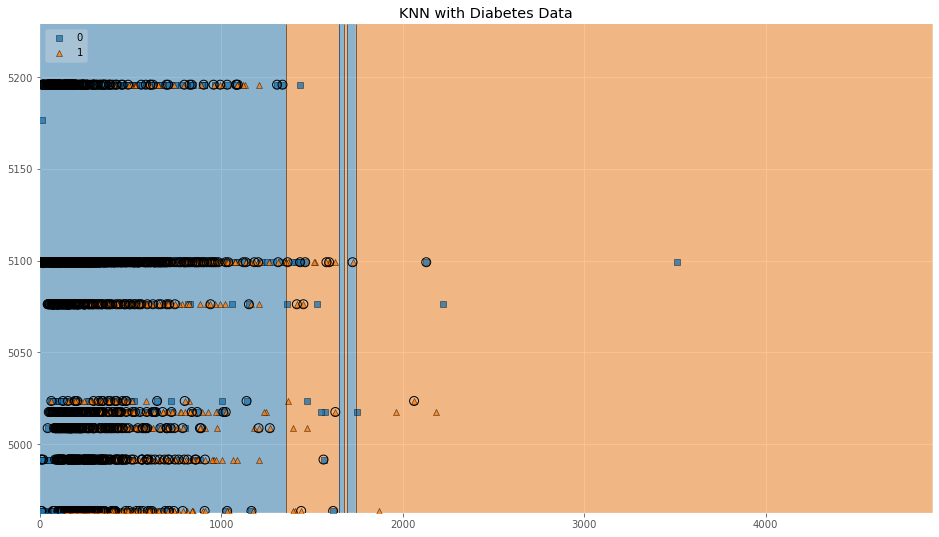

In [147]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

# DECISION TREE
# --------------------------------------------------------------------------------

### 4. Creación del modelo y división del dataset

##### Usaremos la X y la Y ya realizada en el primer modelo de Regresion Logistica

In [148]:
#Cogeremos una profundidad de 3 hojas para este modelo
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

### 5. Entrenamiento

In [149]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

### 6. Análisis de resultados

In [141]:
from sklearn.tree import export_graphviz

In [150]:
export_graphviz(tree_clf,
                out_file='data/iris_tree.dot',
                feature_names=X.columns,
                class_names=['Si','No'],
                rounded=True,
                filled=True)

### 7. Realización de predicciones

In [151]:
# Hacemos predicciones
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)
# Vemos la precisión
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
# Imprimimos resultados
print('La precision del entrenamiento es', train_accuracy)
print('La precision de los test es', test_accuracy)

La precision del entrenamiento es 0.9114147965731331
La precision de los test es 0.9041838633972648


In [152]:
acc_decision_tree = round(tree_clf.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

91.14


### 8. Visualización

In [153]:
! dot -Tpng data/iris_tree.dot -o data/iris_suscripcion.png

![Resultado](data/iris_suscripcion.png)

# --------------------------------------------------------------------------------